In [1]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

# Data cleaning

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [3]:
df = df.drop(168, axis=0)
df.index = pd.to_datetime(df['Month'], format='%Y-%m')
df = df.drop('Month', axis=1)
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [4]:
df.columns = ['Montly milk prod.']
df.tail()

,Montly milk prod.
Month,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


# inital plots

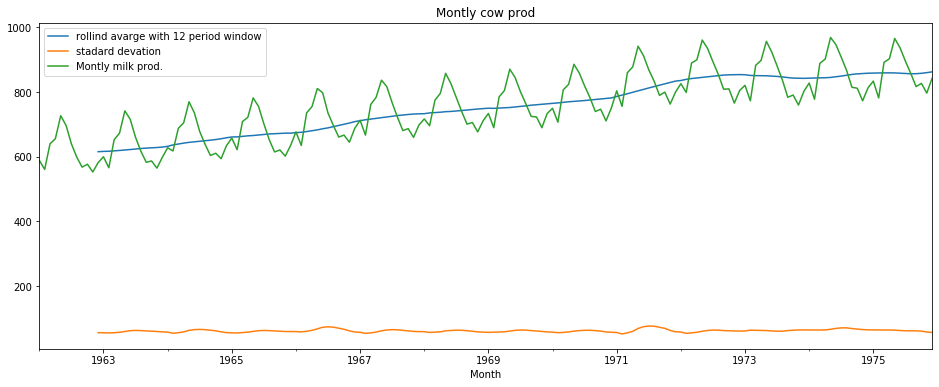

In [5]:
df['Montly milk prod.'].rolling(12).mean().plot.line(figsize=(16,6), title='Montly cow prod', label='rollind avarge with 12 period window')
df['Montly milk prod.'].rolling(12).std().plot.line(label='stadard devation ')
df['Montly milk prod.'].plot()
plt.legend()

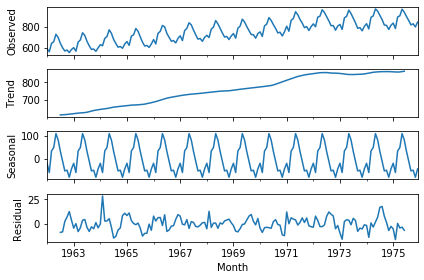

In [6]:
fig = sm.tsa.seasonal_decompose(df).plot()

# checking statonarity

In [7]:
def Dicky(data): 
    """
  
    docstring: a dicky fuller test to test for statonariy
    
    """
    result = sm.tsa.stattools.adfuller(data)
    print('the adf was',result[0] )
    print('the p-value was',result[1])
    
    if (result[1]>0.05):
        print('Fail to reject null hypothesis at a significance level of 0.05%, i.e the series is not statonary')
    else:
        print('Reject the null hypothesis at a significance level of 0.05% i.e the series is statonary')    

In [8]:
Dicky(df['Montly milk prod.'])

the adf was -1.3038115874221246
the p-value was 0.627426708603034
Fail to reject null hypothesis at a significance level of 0.05%, i.e the series is not statonary


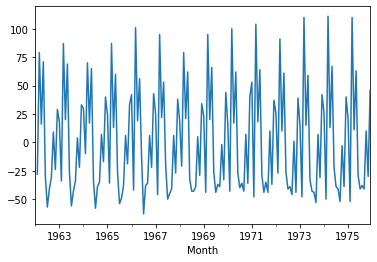

In [9]:
df['First diff'] = df['Montly milk prod.']- df['Montly milk prod.'].shift(1)
df['First diff'].plot()

In [10]:
Dicky(df['First diff'].dropna())

the adf was -3.0549955586530553
the p-value was 0.03006800400178688
Reject the null hypothesis at a significance level of 0.05% i.e the series is statonary


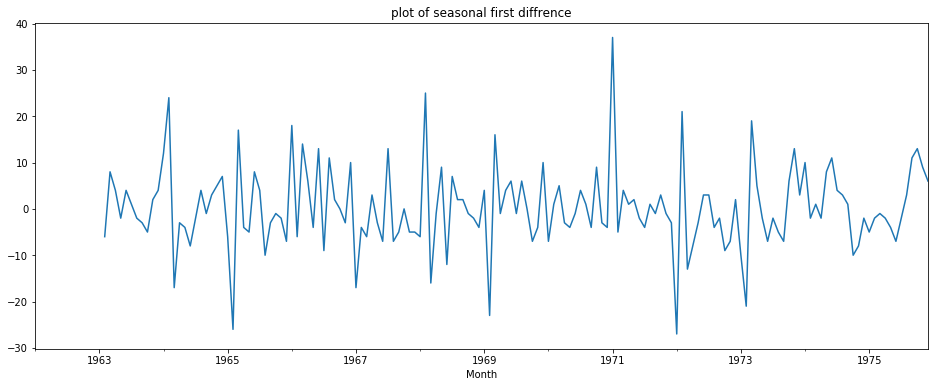

In [11]:
df['Sesonal  first diff'] = df['First diff'] -df['First diff'].shift(12)
df['Sesonal  first diff'].plot(figsize=(16,6), title='plot of seasonal first diffrence')


In [12]:
Dicky(df['Sesonal  first diff'].dropna())

the adf was -5.038002274921985
the p-value was 1.86542343187882e-05
Reject the null hypothesis at a significance level of 0.05% i.e the series is statonary


# ACF and PACF plots

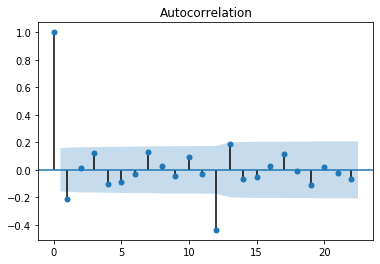

In [13]:

fig = sm.tsa.graphics.plot_acf(df['Sesonal  first diff'].dropna())

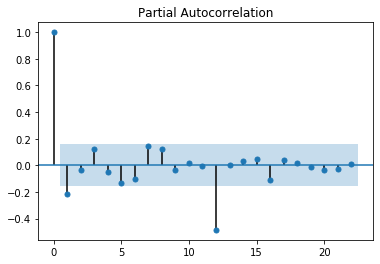

In [14]:
fig = sm.tsa.graphics.plot_pacf(df['Sesonal  first diff'].dropna())

# Sarima models

In [15]:

model = sm.tsa.SARIMAX(df['Montly milk prod.'], order=(1,1,1), seasonal_order=(1,1,1, 12))

/home/kheagan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
 results = model.fit()

In [17]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                  Montly milk prod.   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -529.887
Date:                            Wed, 01 Jan 2020   AIC                           1069.775
Time:                                    20:08:07   BIC                           1084.992
Sample:                                01-01-1962   HQIC                          1075.956
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1395      0.337     -0.413      0.679      -0.801       0.522
ma.L1         -0.0942      0.335   

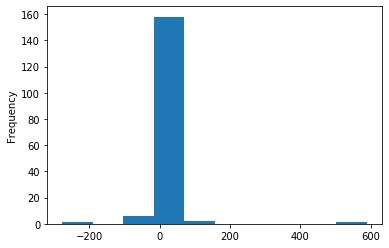

In [18]:
results.resid.plot.hist(20)

In [19]:
df.count()

Montly milk prod.      168
First diff             167
Sesonal  first diff    155
dtype: int64

In [20]:
df['forecast'] = results.predict(start= 200, end=600, dynamic=False)

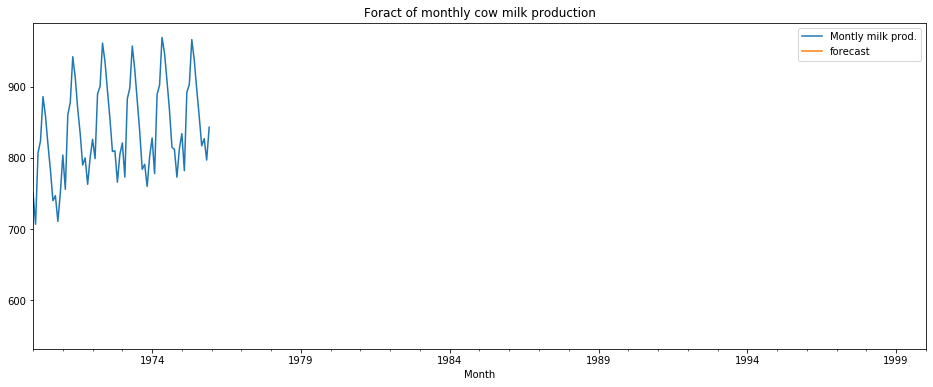

In [21]:
df[['Montly milk prod.', 'forecast']].plot(figsize=(16,6), title='Foract of monthly cow milk production', xlim=(datetime(1970,1,1),datetime(2000,1,1)))